# <center> Machine Learning</center>



## <center></center>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/897px-CRISP-DM_Process_Diagram.png" width="350">
Źródło: https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/897px-CRISP-DM_Process_Diagram.png

<br>




## Some facts about machine learning

* ML is both science and art.

* There is no "best" method - each problem requires an individual approach.

* Solving the ML problem = data representation + algorithm.

  - in everyday practice, the first factor is often underestimated. Data processing is as important as the algorithms themselves, and even often the data is more important than the algorithm - often the form of data (their preparation/processing) has a greater impact on the results than the choice of a specific algorithm.

* It is very important to define the goal we want to achieve and understand how data and algorithms are related to this goal.


 <br>
  
* supervised learning
* unsupervised learning
  
 <br>
 
## Supervised learning
For known pairs (X,Y) we look for the relationship between X and Y - we build a model that will predict Y based on X.
 
* regression: Y is a real variable

* classification: Y is a discrete variable (e.g. binary - with values ​​0 and 1)
 
 <br>
 
 <br>
## Examples:

- credit scoring - predicting whether the customer applying for a loan will repay it on time;


#  <center> Logistic regression</center>

We consider the binary classification problem:: $X \in \mathbb{R}^p$, $Y \in \{0, 1\}$.

Model assumptions:

$$\large Y \sim B(\pi(x)),$$

B($\cdot$) -  

$\pi(x)=P(Y=1 \mid x)$.


$$
Y =
\begin{cases}
1, \text{ with likehlihood } \pi(x)\\
0, \text{ with likelihood } 1-\pi(x).\\
\end{cases}$$

Model:

$$\large \pi(x) = \frac{1}{1+e^{-\beta x}},$$

$\beta = (\beta_0,\beta_1, \ldots, \beta_p),$   $\beta x = \beta_0 + \beta_1 x_1 + \ldots + \beta_p x_p.$

 <br>
 
 <br>
Predicting Y values ​​using logistic regression 


$$
\hat{y} =
\begin{cases}
1, \text{ when } \pi(x) > 0.5\\
0, \text{ when } \pi(x) \leq 0.5\\
\end{cases}
$$
 
 <br>
 
 <br>
 
 <br>

 
Fitting the model = finding the optimal values of the coefficients of the $\beta$ vector, i.e. those that best describe the relationship between $Y$ and $X$.
 <br>
 
 <br>
 
 <br>
 
 
## Maximum likelihood method
Let's consider a binary situation. i.e. $y \in \{0.1\}$. The logarithm of the likelihood function is as follows (X set of observations, Y - set of labels):
 
$ 
\begin{align}
L(\beta \ | \ X,Y) & = \log \prod\limits_{i=1}^n P(Y_i=y_i \ | \ x_i) \\
       & = \log \prod\limits_{i=1}^n \pi(x_i)^{y_i}(1-\pi(x_i))^{1-y_i} \\
       & = \sum\limits_{i=1}^n \log\big( \pi(x_i)^{y_i}(1-\pi(x_i))^{1-y_i}\big) \\
       & = \sum\limits_{i=1}^n y_i\log(\pi(x_i)) + (1-y_i)\log(1-\pi(x_i)) .
\end{align}
$

Let assume: $h(\pi(x),y) = y\log{(\pi(x))} + (1-y)\log{(1-\pi(x))}.$
:

$h(\pi(x),1) = \log{(\pi(x))}$

$h(\pi(x),0) = \log{(1-\pi(x))}$

Fitting the logistic regression model consists in maximizing the likelihood function (technically - its logarithm) - we are looking (numerically) for such vector $\beta$ for which the likelihood is the highest.


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from sklearn.datasets import load_breast_cancer

In [48]:
?load_breast_cancer

In [13]:
data = load_breast_cancer()

In [14]:
X, y = data.data, data.target

In [15]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
y.mean()

0.6274165202108963

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
?LogisticRegression

In [19]:
model = LogisticRegression(max_iter=100000)

In [21]:
model.fit(X,y)

LogisticRegression(max_iter=100000)

In [22]:
model.intercept_, model.coef_

(array([28.64060591]),
 array([[ 0.97855146,  0.18446388, -0.27220034,  0.02276362, -0.18111069,
         -0.21487334, -0.53468564, -0.29779157, -0.2681173 , -0.03022007,
         -0.07909699,  1.23965431,  0.14345379, -0.11060121, -0.02608428,
          0.07255753, -0.03194503, -0.03844704, -0.03495983,  0.01488637,
          0.10166909, -0.43913919, -0.10872099, -0.01306281, -0.36422599,
         -0.6814999 , -1.43201036, -0.61081381, -0.73052386, -0.09456843]]))

In [23]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [24]:
model.predict_proba(X) #the probabilities calculated by the model

array([[1.00000000e+00, 3.28605231e-14],
       [9.99995581e-01, 4.41854191e-06],
       [9.99999432e-01, 5.68271947e-07],
       ...,
       [9.97800219e-01, 2.19978072e-03],
       [1.00000000e+00, 7.47109235e-11],
       [1.06040604e-04, 9.99893959e-01]])

### We evaluate the classifier - the percentage of correct classifications

### Model fit

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
?accuracy_score

In [17]:
accuracy_score(model.predict(X),y)

0.9578207381370826

What does this value tell us? About **fitting**, not how well the model predicts!

### Train and test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#?train_test_split

In [29]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.33)

In [30]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy_score(y_pred,y_test)

0.9202127659574468

### TASK: 
Print accuracy for 10 random divisions into the training and testing part.


In [33]:
for i in range(10):
    X_train, X_test , y_train, y_test = train_test_split(X,y)
    model.fit(X_train,y_train)
    print(accuracy_score(model.predict(X_test),y_test))

0.9440559440559441
0.9440559440559441
0.958041958041958
0.9440559440559441
0.9440559440559441
0.9230769230769231
0.958041958041958
0.9790209790209791
0.9440559440559441
0.965034965034965


Statistics! We have a small set, so the estimation of the model's prediction quality is not accurate.

### Cross- validation 
Benefits of Cross-Validation:
 - It helps evaluate the quality of your model.
 - It helps to reduce/avoid problems of overfitting and underfitting.
 - It lets you select the model that will deliver the best performance on unseen data.
 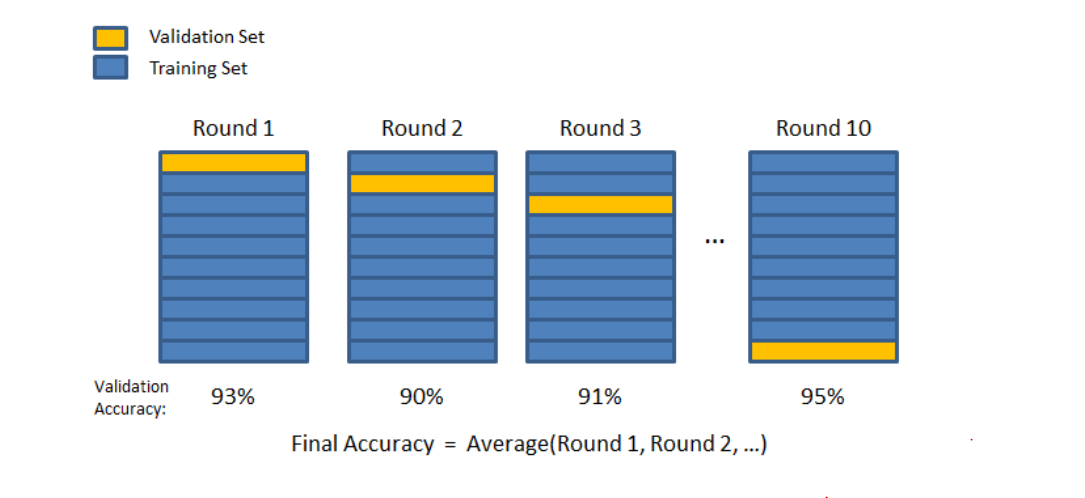

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
?cross_val_score

In [37]:
cs = cross_val_score(LogisticRegression(max_iter=100000), X,y, cv=10)

In [38]:
cs

array([0.98245614, 0.9122807 , 0.92982456, 0.94736842, 0.98245614,
       0.98245614, 0.92982456, 0.94736842, 0.96491228, 0.96428571])

In [39]:
cs.mean()

0.9543233082706767

## Accuracy measures

In real problems related to an obvious decision (e.g. binary classification), very often different errors have different weights. Example: -> convicting an innocent person is a reason for a mistake much more than not convicting a guilty person (in our culture). Therefore, in data science practice, it is very important to choose the basis of measures for the problem (agreement on the business goal!). In the binary class, in practice we always assume that the  1  class is a distinguished class. We call the  1  class the "positive" class, and the  0  class - "negative".


### Basics:


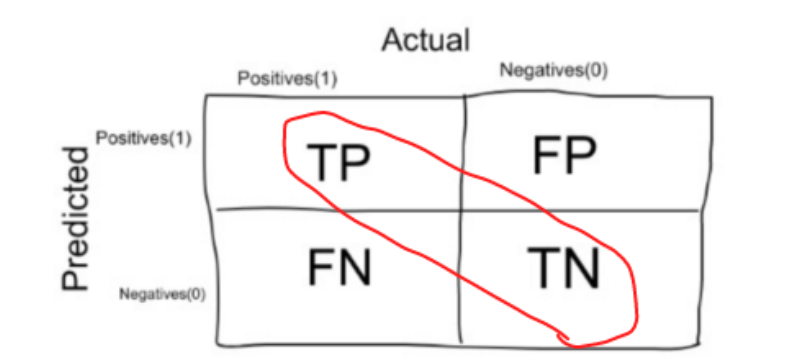


## Accuracy measures:
**Precision** - tells how *precise* the classifier is - i.e. how often what the classifier indicated as positive is actually positive:


$$precision = \frac{TP}{TP + FP}$$

**Recall** - talks about how *sensitive* the classifier is - i.e. how well it detects observations that are positive:

$$recall = \frac{TP}{TP+FN}$$

**F1** - harmonic mean of precision and recall:

$$F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 \cdot \frac{precicion \cdot recall}{precision + recall}$$




In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [41]:
y_true = [0, 0, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1]

precision_score(y_true, y_pred)

1.0

In [42]:
f1_score(y_true, y_pred)

0.5

In [43]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



# Regularization

Regularization - protection against overfitting and can improve the generalization performance.

### Model fitting



Regularization in Logistic Regression

Regularization is extremely important in logistic regression modeling. Without regularization, the asymptotic nature of logistic regression would keep driving loss towards 0 in high dimensions. Consequently, most logistic regression models use one of the following two strategies to dampen model complexity:

    L2 regularization.
    Early stopping, that is, limiting the number of training steps or the learning rate.

Regularization helps drive outlier weights (those with high positive or low negative values) closer to 0 but not quite to 0. Features with values very close to 0 remain in the model but don't influence the model's prediction very much.

Increasing the regularization strength penalizes "large" weight coefficients -- our goal is to prevent that our model picks up "peculiarities," "noise," or "imagines a pattern where there is none.

L2 regularization always improves generalization in linear models.


### Regression with L2:

$$\hat{\beta} = arg \min\limits_{\beta} \big( -\sum\limits_{i=1}^n h(\pi(x_i),y_i) + \lambda\|\beta\|_2^2 \big),$$

$\|\beta\|_2$ -  $\beta$: $\sqrt{\sum\limits_{i=1}^p\beta_i^2}$,



Where do I get the value of $\lambda$? You have to determine yourself empirically - test the model with different values ​​and choose the one for which the results are the best. Through the parameter $\lambda$ we can control the impact of the regularization term:
- Higher values lead to smaller coefficients, 
- but too high values for $\lambda$ can lead to underfitting.



### The l1 standard is also often used: $\sum\limits_{i=1}^p|\beta_i|$. 




In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
?LogisticRegression

prob = 1/(1+np.exp(-beta[0]-beta[1]*x))
y = np.random.binomial(1,prob)

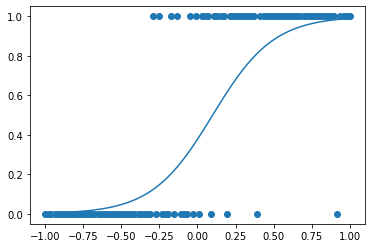

In [33]:
plt.plot(x,prob)
plt.scatter(x,y)
plt.show()

In [34]:
# X matrix, where in the first column there is a grid from -1 to 1, and in the next there are subsequent powers of this value

X = np.vstack([x**p for p in range(1,20)]).T
X

array([[-1.        ,  1.        , -1.        , ..., -1.        ,
         1.        , -1.        ],
       [-0.97979798,  0.96000408, -0.94061006, ..., -0.70684009,
         0.69256049, -0.67856937],
       [-0.95959596,  0.92082441, -0.88361938, ..., -0.49602433,
         0.47598295, -0.45675131],
       ...,
       [ 0.95959596,  0.92082441,  0.88361938, ...,  0.49602433,
         0.47598295,  0.45675131],
       [ 0.97979798,  0.96000408,  0.94061006, ...,  0.70684009,
         0.69256049,  0.67856937],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [46]:
#Matching the model without regularisation:

model = LogisticRegression(max_iter=100000,C=10000000)
model.fit(X[:,:1],y)
model.intercept_, model.coef_

(array([15.24527771]), array([[-1.03354743]]))

It's quite close.

Now with regularization still based on x alone:

In [47]:
#In code hyper parameter C is Inverse of regularization strength;C= 1/ λ
model = LogisticRegression(max_iter=100000,C=1)
model.fit(X[:,:1],y)
model.intercept_, model.coef_

(array([15.120902]), array([[-1.02475609]]))

The coefficients have decreased.

Let's see how it makes sense in the case when we have unnecessary variables in the model.

First without regularization:

In [40]:
model = LogisticRegression(max_iter=100000,C=10e10)
model.fit(X,y)
model.intercept_, model.coef_

(array([-0.0324802]),
 array([[  13.9609007 ,   42.96549302, -222.28790444, -428.58875158,
         1335.60087472,  163.1237594 ,  280.19901698, -278.47204217,
         -373.3514892 , -535.36025496, -524.66644722, -476.64717725,
         -361.57723476, -207.25973308,  -31.88775224,  169.7026856 ,
          369.06269774,  583.08635823,  782.27766457]]))

We see that the coefficients at variables that do not occur in the true relationship are very large (and if the model detected the true relationship, they would be zero).


C:\Users\rokicma1\AppData\Local\Temp\2\ipykernel_26392\1095905661.py:1: RuntimeWarning: overflow encountered in exp
  plt.plot(x,1/(1 +np.exp(-model.intercept_ - np.dot(X, model.coef_.T))))


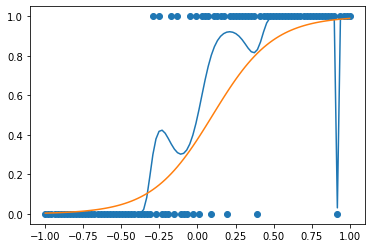

In [41]:
plt.plot(x,1/(1 +np.exp(-model.intercept_ - np.dot(X, model.coef_.T))))
plt.plot(x,prob)
plt.scatter(x,y)
plt.show()

Now with regularization, and lets have a look at the graph:

[0.19610121] [[ 3.17474694 -0.4276833   0.75638225 -0.32594066  0.1967335  -0.26372823
   0.02505451 -0.21462907 -0.02692505 -0.17035726 -0.03529289 -0.13036482
  -0.02675682 -0.09494368 -0.01202148 -0.06410349  0.00427135 -0.03759026
   0.02004995]]


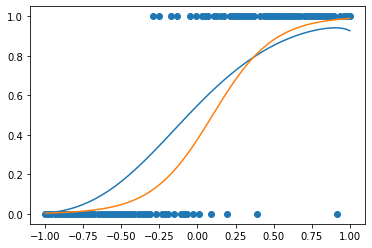

In [42]:
model = LogisticRegression(max_iter=100000,C=1)
model.fit(X,y)
print(model.intercept_, model.coef_)

plt.plot(x,1/(1 +np.exp(-model.intercept_ - np.dot(X, model.coef_.T))))
plt.plot(x,prob)
plt.scatter(x,y)
plt.show()

### How to tell if a model is a good fit? Is it too weak or too strong?

1. When on the test set a low percentage of correct predictions (e.g. 60%), and on the training set a very #over-fitted model (e.g. 90%) -> overtrained model

2. When on the training set a very low-fitting model (e.g. in the order of fifty-odd percent) -> poorly-fitting model.

What is low fit? -> depends on data...

What is the big difference? -> depends on the data... (and their size - statistical significance!). Realistically, the results on the test should be slightly lower than the match on the training (or similar). Obviously, the classifier cannot work better than matching on the training set - because the matching shows how many dependencies it has detected in the data on the basis of which it will classify. Thus, if we have a match on the training set, e.g. 90%, then the maximum predictive power that we can expect is 90%.



### Data preparation - a very important matter!!!

Do the values of the variables affect the result of the model?

Let's imagine two variables, where one has magnitudes of order 1 and the other of order 100, and the actual coefficient for the former is 1 and the latter is 0.01.

What will be the consequences of applying regularization?

The first variable will be "punished" much more than the second one, i.e. the model will strongly "download" the coefficient with the first one, and leave it with the second one...

## How to fix it? -> scaling



In [40]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.33)

In [80]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [43]:
X_tr = sc.transform(X_train)
X_te = sc.transform(X_test)

## Pipeline
In the example above, we can see that building a model actually consists of two steps - transforming the variables, and then fitting the model. These are the so-called pipelines.

In [78]:
from sklearn.pipeline import Pipeline

In [ ]:
?Pipeline

In [45]:
pipe = Pipeline([("standarization",StandardScaler()),("LogisticRegression",LogisticRegression())])

In [46]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standarization', StandardScaler()),
                ('LogisticRegression', LogisticRegression())])

In [47]:
pipe.predict(X_test)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
accuracy_score(pipe.predict(X_test), y_test)

0.8787878787878788

### TASK: 

Crossvalidate the accuracy of this pipeline (use the cross_val_score function)

In [ ]:
cross_val_score(pipe, X,y, cv=10).mean()

0.8099999999999999

# Parameter optimization

GridSearch

In [57]:
from sklearn.model_selection import GridSearchCV

In [55]:
?GridSearchCV

In [72]:
param_grid = {"solver":['newton-cg', 'lbfgs', 'saga'],
              "max_iter": [1000,10000],
              "C":[1000,100,10,1,0.1,0.01]}

gs = GridSearchCV(LogisticRegression(),param_grid,cv = 5)

In [73]:
gs.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1000, 100, 10, 1, 0.1, 0.01],
                         'max_iter': [1000, 10000],
                         'solver': ['newton-cg', 'lbfgs', 'saga']})

In [74]:
gs.cv_results_

{'mean_fit_time': array([0.00800319, 0.00800147, 0.01720347, 0.00760121, 0.0069418 ,
        0.05209093, 0.00520506, 0.00457711, 0.01480637, 0.00494452,
        0.0046361 , 0.02437649, 0.00380192, 0.00300179, 0.00480094,
        0.0038013 , 0.00320101, 0.0050005 , 0.00320148, 0.00180068,
        0.00140228, 0.00319753, 0.00179958, 0.0018034 , 0.00299845,
        0.00180039, 0.0008008 , 0.00260186, 0.00180335, 0.0008029 ,
        0.00219846, 0.00260072, 0.00079827, 0.00223484, 0.00140324,
        0.00080147]),
 'std_fit_time': array([0.00228021, 0.00167517, 0.00132674, 0.00249763, 0.00104708,
        0.02875358, 0.00132956, 0.00161848, 0.00401107, 0.00133233,
        0.00131393, 0.01231911, 0.00116616, 0.00063211, 0.00040002,
        0.00074717, 0.00074903, 0.00063324, 0.00097948, 0.00074799,
        0.00080256, 0.00039809, 0.00039916, 0.00039746, 0.00089198,
        0.0004    , 0.00040041, 0.00048804, 0.00039243, 0.00040147,
        0.00040282, 0.00101864, 0.00039914, 0.00047057, 0.000

In [75]:
gs.best_estimator_

LogisticRegression(C=10, max_iter=1000, solver='newton-cg')

In [76]:
gs.best_params_

# Note: it only returns the parameters we optimized, not all the parameters of the model

{'C': 10, 'max_iter': 1000, 'solver': 'newton-cg'}

### Version with pipeline:

In [81]:
pipe = Pipeline([("scale",StandardScaler()),("log_reg",LogisticRegression())])

param_grid = {"scale__with_mean":[True],
              "log_reg__penalty":["l2"],
              "log_reg__C":[1000,100,10,1,0.1,0.01]}

gs = GridSearchCV(pipe,param_grid,cv = 5)

gs.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'log_reg__C': [1000, 100, 10, 1, 0.1, 0.01],
                         'log_reg__penalty': ['l2'],
                         'scale__with_mean': [True]})

In [83]:
gs.best_params_

{'log_reg__C': 10, 'log_reg__penalty': 'l2', 'scale__with_mean': True}

### END